As I don't yet have found a dataset with more features, I will start to implement the script with the solvation dataset.

In [10]:
import pandas as pd
import numpy as np
#import rdkit

%matplotlib inline

### Loading the data

In [11]:
dataset = pd.read_csv('../datasets/FreeSolv/SAMPL.csv')

In [12]:
type(dataset)

pandas.core.frame.DataFrame

In [13]:
dataset.head()

,iupac,smiles,expt,calc
0,"4-methoxy-N,N-dimethyl-benzamide",CN(C)C(=O)c1ccc(cc1)OC,-11.01,-9.625
1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219
2,3-methylbut-1-ene,CC(C)C=C,1.83,2.452
3,2-ethylpyrazine,CCc1cnccn1,-5.45,-5.809
4,heptan-1-ol,CCCCCCCO,-4.21,-2.917


### Data Exploration

In [14]:
df = dataset.drop(columns = ['iupac'])

In [15]:
df.describe()

,expt,calc
count,642.000000,642.000000
mean,-3.803006,-3.486223
std,3.847820,4.186301
min,-25.470000,-21.762000
25%,-5.727500,-5.421500
50%,-3.530000,-3.053500
75%,-1.215000,-0.480750
max,3.430000,3.335000


I'll take a small subset for now.

In [16]:
df = df.sample(n = 20)
df

,smiles,expt,calc
22,C1CCCC(CC1)O,-5.48,-4.345
100,CCCCl,-0.33,0.973
247,c1ccc2c(c1)C(=O)c3c(ccc(c3C2=O)N)N,-11.85,-15.252
246,c1ccc2c(c1)C(=O)c3c(ccc(c3C2=O)O)N,-9.53,-10.984
628,C1CC=CC1,0.56,1.230
13,CCCCC(=O)OCC,-2.49,-3.110
438,CCC=C,1.38,2.367
27,CC(C)C(=O)C(C)C,-2.74,-2.629
232,c1cc2c(cc1Cl)Oc3ccc(cc3O2)Cl,-3.67,-3.321
164,COC(=O)CCl,-4.00,-3.816


## Transform SMILES to Fingerprints

Still to answer: Are these SMILES canonical or not?
I would love to transform the SMILES to [Extended Connectivity Fingerprints (ECFPs)](https://docs.chemaxon.com/display/docs/Extended+Connectivity+Fingerprint+ECFP). However, I can't find a way to do that so far. The methods I find are either terminal (I assume, but don't know for sure) or in Java. (ECFP = Morgan fingerprint)

But I found a way for [Morgan fingerprints](http://www.rdkit.org/docs/GettingStartedInPython.html). [Here's](http://bigchem.eu/sites/default/files/Martin_Vogt_algorithms_in_cheminformatics_150519.pdf) how Morgan Fingerprints ("circular Fingerprints") work.
Nevermind.

My next try: creating Rdkit fingerprints. [This blog](https://iwatobipen.wordpress.com/2019/02/08/convert-fingerprint-to-numpy-array-and-conver-numpy-array-to-fingerprint-rdkit-memorandum/) is superb.

there is [MolFromSmiles](https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html) -> Construct a molecule from a SMILES string

[FingerprintsfromSmiles](https://www.rdkit.org/docs/source/rdkit.Chem.Fingerprints.FingerprintMols.html)

In [17]:
#from rdkit.Chem.Fingerprints import FingerprintMol
#from rdkit import Chem
#from rdkit.Chem import Fingerprints

import rdkit.Chem.Fingerprints.FingerprintMols as fp_from_smiles

In [18]:
df['id'] = range(len(df))    # the function requires an id column
#df['id'] = pd.to_numeric(range(len(df)))   no.

In [19]:
# why does this not work?

#my_fingerprints = fp_from_smiles.FingerprintsFromSmiles(dataSource=df, idCol='id', smiCol='smiles')
# or potentially idCol=df.index

arguments:    dataSource, idCol, smiCol, fingerprinter=<Boost.Python.function object>, reportFreq=10, maxMols=-1, \**fpArgs

fpArgs are passed as keyword arguments to the fingerprinter\
Returns a list of 2-tuples: (ID,fp)


Another try with Topological Fingerprints (RDK fingerprints) [Explanation](http://www.rdkit.org/docs/GettingStartedInPython.html).

In [20]:
from rdkit import DataStructs
import rdkit.Chem as chem

In [21]:
smiles_list = df['smiles'].tolist()

mols_list = [chem.MolFromSmiles(x) for x in smiles_list]

fingerprints_list = [chem.RDKFingerprint(x) for x in mols_list]

In [22]:
fingerprints_list[3]

In [23]:
fingerprints_list[3].ToBitString()

'110001010010000001000001010001000011000010000001001111000000000100001010011010011000000011111100001001010000001011000000000100001000000000000000000011100101110011010010111011000010001000010110001111011010101011101000101000100001010000100011010011111000110100110100011011110000111111000100100110100001000001001001000000101000011000110001010001001000100001000000010000001000010001000100000000000000000111010011110111000011011100000000010011110100010101100000100101101000001100100000100000101101001010100100000000000100000100000100011010011000100000100000100011000001000000001111001111000000000000000001000111101000000100110010001000000000000000011101101100011100110100000010010111100010110001000000000000001001000100100000101001011010010100000000110000000010110010010000000000010100000000110010100110101000100100110000001001000000101101100111101000100100001100010100110110011110110010011010010101000010001000100001101000000101111101100000000000010100010111110101100001110100000101010001111111111000001

In [24]:
len(fingerprints_list[9].ToBitString())      # fixed length: 2048 bits

2048

In [25]:
#for i in 0:(len(fingerprints_list)-1):
#    fingerprints_list[i] = fingerprints_list[i].ToBitString()

# So here's le UGH-LY brute force way:
df['fingerprint'] = 1    

In [26]:
df.iloc[0,4] = fingerprints_list[0].ToBitString()
df.iloc[1,4] = fingerprints_list[1].ToBitString()
df.iloc[2,4] = fingerprints_list[2].ToBitString()
df.iloc[3,4] = fingerprints_list[3].ToBitString()
df.iloc[4,4] = fingerprints_list[4].ToBitString()
df.iloc[5,4] = fingerprints_list[5].ToBitString()
df.iloc[6,4] = fingerprints_list[6].ToBitString()
df.iloc[7,4] = fingerprints_list[7].ToBitString()
df.iloc[8,4] = fingerprints_list[8].ToBitString()
df.iloc[9,4] = fingerprints_list[9].ToBitString()
df.iloc[10,4] = fingerprints_list[10].ToBitString()
df.iloc[11,4] = fingerprints_list[11].ToBitString()
df.iloc[12,4] = fingerprints_list[12].ToBitString()
df.iloc[13,4] = fingerprints_list[13].ToBitString()
df.iloc[14,4] = fingerprints_list[14].ToBitString()
df.iloc[15,4] = fingerprints_list[15].ToBitString()
df.iloc[16,4] = fingerprints_list[16].ToBitString()
df.iloc[17,4] = fingerprints_list[17].ToBitString()
df.iloc[18,4] = fingerprints_list[18].ToBitString()
df.iloc[19,4] = fingerprints_list[19].ToBitString()

In [18]:
df

,smiles,expt,calc,id,fingerprint
238,c1cc(cc(c1)O)C=O,-9.52,-9.369,0,0000000000000000000000000000000000000000100000...
357,c1ccc(c(c1)N)[N+](=O)[O-],-7.37,-7.660,1,0000000000000000000000000000000000000000000000...
41,CCCCCCCC=C,2.06,2.995,2,0000000000000000000000000000000000000000000000...
496,CC(=CCC[C@](C)(C=C)OC(=O)C)C,-2.49,-2.964,3,0000000010000001000000001000000000000000000000...
109,COC(c1ccccc1)(OC)OC,-4.04,-5.559,4,0000000010000000000000110000000000000000000000...
424,CCC(C)CC,2.51,2.613,5,0000000000000000000000000000000000000000000000...
305,Cc1cccc(n1)C,-4.59,-3.443,6,1000010000010000000000100000000000100000000010...
169,c1cc2c(cc1Cl)Oc3c(c(c(c(c3Cl)Cl)Cl)Cl)O2,-4.15,-2.310,7,0001000010000100100010000010001001000011100000...
182,CC(C)OC,-2.01,-0.657,8,0000000000000000000000000000000000000000000000...
408,CSC,-1.61,0.440,9,0000000000000000000000000000000000000000000000...


## Generate a umap of the fingerprints

First of all, I need to encode the fingerprints as one-hot. For that, I need to make a list of one-hot matrices.

In [19]:
#fp_series = df['fingerprint']
#onehot = pd.get_dummies(fp_series)

#onehot = pd.get_dummies(df['fingerprint'])

In [20]:
#import sklearn.preprocessing as sk

In [21]:
#fp_onehot_list = df['fingerprint'].tolist()
#a = pd.get_dummies(fp_onehot_list[3])


#categories = [0,1]

#b = sk.OneHotEncoder(fp_onehot_list[3],
#                    categories = ['0','1'])

## Umap dimension reduction

https://pypi.org/project/umap-learn/

https://umap-learn.readthedocs.io/en/latest/basic_usage.html

I need more physiochemical properties of course..
I followed [this example](https://umap-learn.readthedocs.io/en/latest/parameters.html).

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [28]:
import umap

In [29]:
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})
np.random.seed(42)

In [30]:
#umap_input = np.zeros(2048)*20
umap_input = np.random.randn(20,2048)    # I'd prefer to initiate it as 0, but don't know how

for i in range(len(df)-1):
    umap_input[i] = list(df.iloc[i,4])

In [31]:
fit = umap.UMAP()
%time u = fit.fit_transform(umap_input)

CPU times: user 6.71 s, sys: 69.9 ms, total: 6.78 s
Wall time: 6.56 s


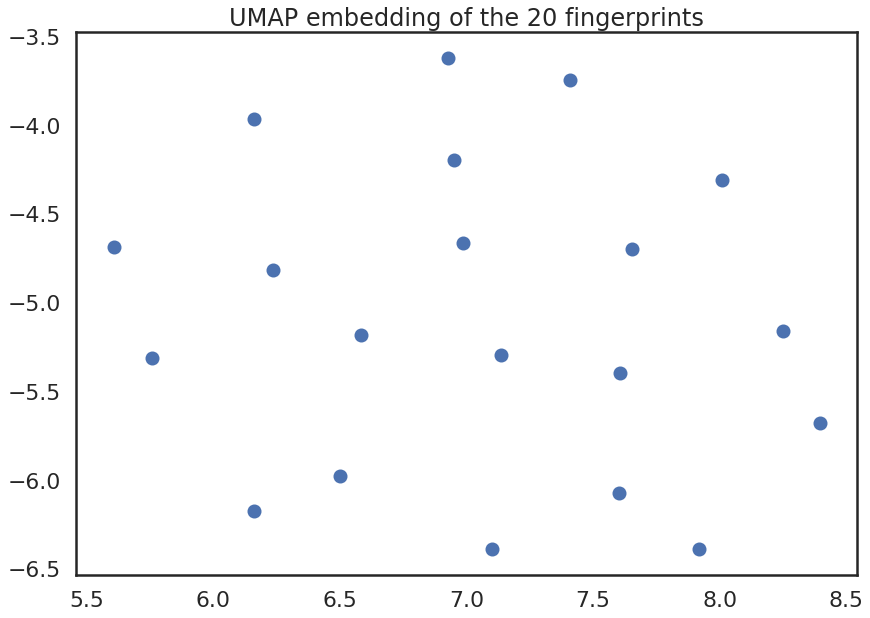

In [32]:
plt.scatter(u[:,0], u[:,1])
plt.title('UMAP embedding of the 20 fingerprints');

I could try to tweak n_neighbours, min_dist, n_components or metric.

To color by solvation, I follow a different [guide](https://umap-learn.readthedocs.io/en/latest/plotting.html).

In [3]:
import umap.plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


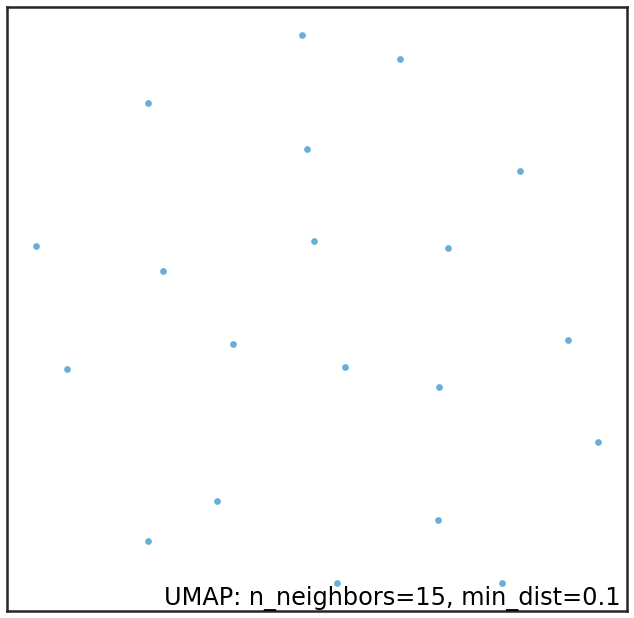

In [34]:
umap.plot.points(fit)